<h1> K-Means clustering </h1>
<h3> Aplicado a la venta de videojuegos </h3>
<h5>Desarrollador por: Sebastián Marroquín</h5>

![Games1](img/VideoGames_1.gif)

En esta implementación, utilizaremos el algoritmo de *K-Means* para analizar la venta de videojuegos. En está notebook se pretende mostrar los juegos más vendidos desde la perspectiva global, luego examinar los juegos en términos de género y plataforma, los géneros de juego según la región y finalmente el año en que se lanzan los 1000 juegos más vendidos y sus editores. También ofreceremos información sobre juegos, editores y plataformas.

***

<h4>Sobre el conjunto de datos:</h4>

Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100,000 copias. Fue generado a partir de la página https://www.vgchartz.com/. 

El archivo incluye lo siguiente:

* Rango - Clasificación de las ventas totales
* Nombre - El nombre de los juegos
* Plataforma - Plataforma del lanzamiento de juegos (es decir, PC, PS4, etc.)
* Año - Año del lanzamiento del juego 
* Género - Género del juego
* Editor - Editor del juego
* NA_Sales - Ventas en América del Norte (en millones)
* EU_Sales - Ventas en Europa (en millones)
* JP_Sales - Ventas en Japón (en millones)
* Other_Sales - Ventas en el resto del mundo (en millones)
* Global_Sales - Total de ventas en todo el mundo.

![Kaggle](img/Kaggle.png)

El archivo de datos puede ser visitado y descargado desde Kaggle utilizando el link: https://www.kaggle.com/gregorut/videogamesales

***
&emsp;

<h1>Aprendizaje no supervisado</h1>

![Unsupervised](img/Unsupervised.gif)

Las transformaciones no supervisadas de un conjunto de datos son algoritmos que crean una nueva representación de los datos que podría ser más fácil de entender para los humanos u otros algoritmos de aprendizaje automático en comparación con la representación original de los datos.

Una aplicación común de las transformaciones sin supervisión es la reducción de dimensionalidad, que toma una representación dimensional alta de los datos, que consta de muchas características, y encuentra una nueva forma de representar estos datos que resume las características esenciales con menos características.

Una aplicación común para la reducción de dimensionalidad es la reducción a dos dimensiones para fines de visualización.

Otra aplicación para transformaciones sin supervisión es encontrar las partes o componentes que "componen" los datos. Un ejemplo de esto es la extracción de temas en colecciones de documentos de texto. Aquí, la tarea es encontrar los temas desconocidos de los que se habla en cada documento, y aprender qué temas aparecen en cada documento. Esto puede ser útil para seguir la discusión de temas como elecciones, control de armas o estrellas del pop en las redes sociales.

<h2>Desafios del aprendizaje no supervisado</h2>

![Challenge](img/Challenge.gif)

Un desafío importante en el aprendizaje no supervisado es evaluar si el algoritmo aprendió algo útil.

Los algoritmos de aprendizaje no supervisados generalmente se aplican a datos que no contienen ninguna información de etiqueta, por lo que no sabemos cuál debería ser el resultado correcto.

Por lo tanto, es muy difícil decir si un modelo "funcionó bien". Como consecuencia, los algoritmos no supervisados se usan a menudo en un entorno exploratorio, cuando un científico de datos quiere comprender mejor los datos, en lugar de como parte de un sistema automático más grande. Otra aplicación común para algoritmos no supervisados es como un paso de preprocesamiento para algoritmos supervisados.

Aprender una nueva representación de los datos a veces puede mejorar la precisión de los algoritmos supervisados, o puede reducir la memoria y el consumo de tiempo.

***
&emsp;

<h4>Importando librerias necesarias</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
import time, random, math, csv
warnings.filterwarnings("ignore")

<h1>1. Accediendo al conjunto de datos</h1>

In [2]:
vgsales = pd.read_csv('data/vgsales.csv')
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


En la siguiente tabla podemos observar las 4 filas del inicio del conjunto de datos

In [3]:
from plotly.tools import FigureFactory as FigFact
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

tab_ = vgsales.head(4)
colorscale = "RdBu"
table = FigFact.create_table(tab_, colorscale=colorscale)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 9
iplot(table)

***

&emsp;
<h2>Top 100 VideoJuegos</h2>

El siguiente gráfico muestra las ventas del Top de los videojuegos correspondientes a su región.

In [4]:
df = vgsales.head(100)

In [5]:
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df.Rank,
                    y = df.NA_Sales,
                    mode = "markers",
                    name = "Estados Unidos",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= df.Name)

trace2 = go.Scatter(
                    x = df.Rank,
                    y = df.EU_Sales,
                    mode = "markers",
                    name = "Europa",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= df.Name)
trace3 = go.Scatter(
                    x = df.Rank,
                    y = df.JP_Sales,
                    mode = "markers",
                    name = "Japon",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= df.Name)
trace4 = go.Scatter(
                    x = df.Rank,
                    y = df.Other_Sales,
                    mode = "markers",
                    name = "Otros",
                    marker = dict(color = 'lime',size=8),
                    text= df.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'Estados Unidos, Europa, Japon y otras ventas del Top 100 de VideoJuegos',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

Como pudimos observar del grafico anterior, el videojuego de **Wii Sports** ocupa el primer lugar y especialmente las ventas en Estados Unidos. *Wii Sports* es un videojuego deportivo desarrollado y publicado por Nintendo para la consola de videojuegos Wii. El juego fue lanzado en Estados Unidos junto con la Wii el 19 de noviembre de 2006, y fue lanzado en Japón, Australia y Europa al mes siguiente. El juego es una colección de cinco simulaciones deportivas, diseñadas para demostrar las capacidades de detección de movimiento del Wii Remote. 


![Wii](img/WiiSports.jpg)

&emsp;

En segundo lugar tenemos al famoso **Super Mario Bros.** Es un videojuego de plataformas desarrollado y publicado por Nintendo. El sucesor del juego arcade de 1983, Mario Bros., fue lanzado en Japón en 1985 para la Famicom, y en Estados Unidos y Europa para Nintendo Entertainment System (NES) en 1985 y 1987 respectivamente. Los jugadores controlan a Mario, o a su hermano Luigi en el modo multijugador, mientras viajan por el Reino Champiñón para rescatar a la princesa Toadstool del antagonista, Bowser.

![Mario](img/MarioBros.gif)

&emsp;

En el ranking tambien le siguen juegos como:

* Mario Kart Wii,
* Wii Sports Resort,
* Pokemon Red / Pokemon Blue,
* Tetris,
* New Super Mario Bros,
* Wii Play,
* New Super Mario Bros Wii,
* Duck Hunt

***
&emsp;

<h2>Plataformas más utilizadas para jugar videojuegos</h2>

![GameBoy](img/GameBoy.gif)

A continuación presentaremos una gráfica de pastel, donde muestre las difrentes consolas y dispositivos para jugar videojuegos

In [6]:
print('Tipo de plataforma: {}\n'.format(df.Platform.unique()))

Tipo de plataforma: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP']



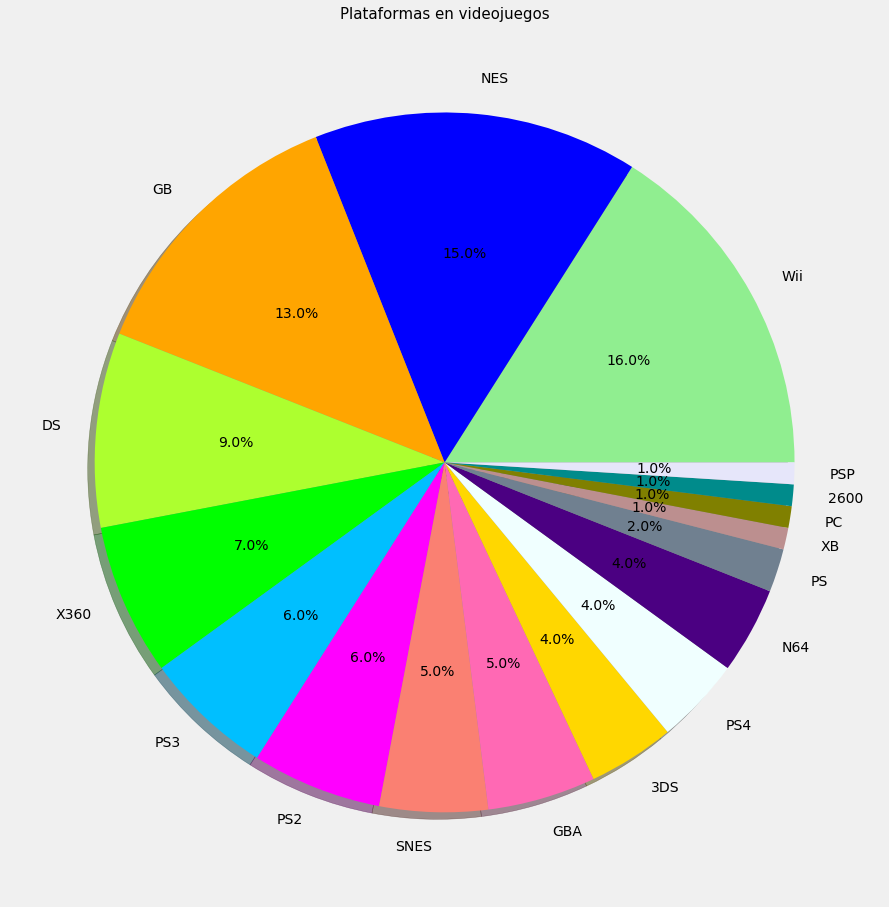

In [7]:
labels = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP']
size = df['Platform'].value_counts()
colors = ['lightgreen', 'blue', 'orange', 'greenyellow', 'lime', 'deepskyblue', 'magenta', 'salmon', 'hotpink', 
          'gold', 'azure', 'indigo', 'slategrey', 'rosybrown', 'olive', 'darkcyan', 'lavender']

plt.rcParams['figure.figsize'] = (15, 15)
plt.pie(size, colors = colors, explode = None, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Plataformas en videojuegos', fontsize = 15)
plt.axis('off')
plt.show()

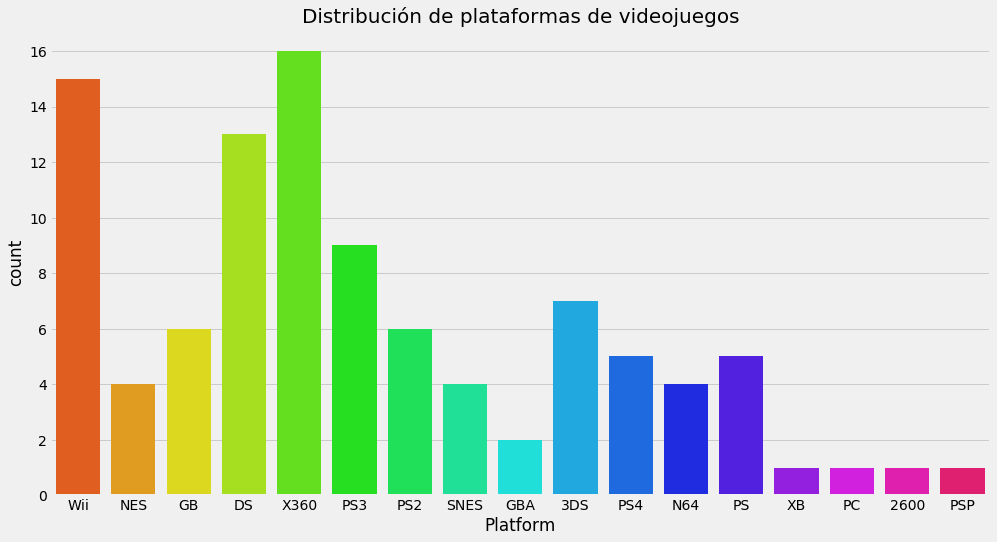

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Platform'], palette = 'hsv')
plt.title('Distribución de plataformas de videojuegos', fontsize = 20)
plt.show()

***
&emsp;

<h2>Generos en los videojuegos</h2>

![GenreVideoGames](img/GenreVideoGames.gif)

A continuación visualizaremos los diferentes tipos de generos que existen en el conjunto de datos, y lo mostraremos en forma de una gráfica de pastel. 

In [9]:
print('Generos de videojuegos: {}\n'.format(df.Genre.unique()))

Generos de videojuegos: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure']



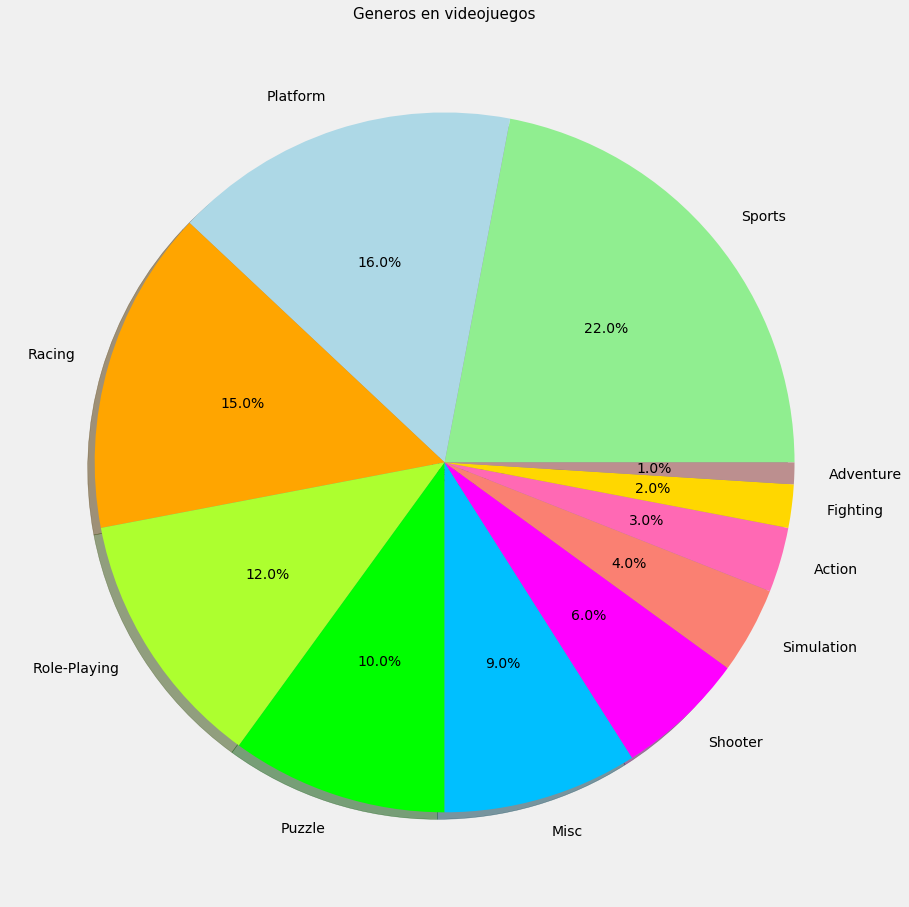

In [10]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 
          'Simulation', 'Action', 'Fighting', 'Adventure']
size = df['Genre'].value_counts()
colors = ['lightgreen', 'lightblue', 'orange', 'greenyellow', 'lime', 'deepskyblue', 
          'magenta', 'salmon', 'hotpink', 'gold', 'rosybrown']

plt.rcParams['figure.figsize'] = (15, 15)
plt.pie(size, colors = colors, explode = None, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Generos en videojuegos', fontsize = 15)
plt.axis('off')
plt.show()

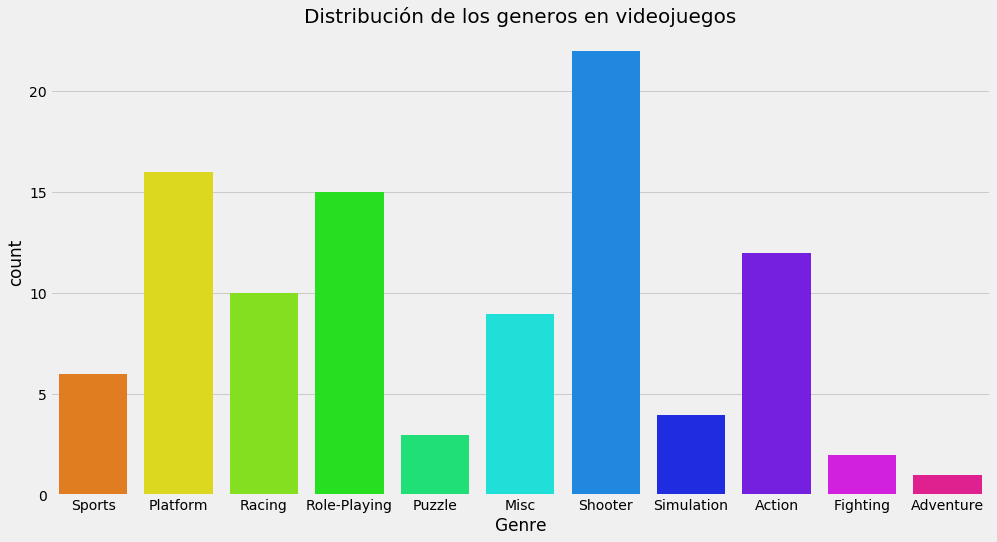

In [11]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Genre'], palette = 'hsv')
plt.title('Distribución de los generos en videojuegos', fontsize = 20)
plt.show()

***
&emsp;

<h2>Compañías de videojuegos</h2>

![Collage](img/Collage.png)

&emsp;

In [12]:
print('Compañias de videojuegos: {}\n'.format(df.Publisher.unique()))

Compañias de videojuegos: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari']



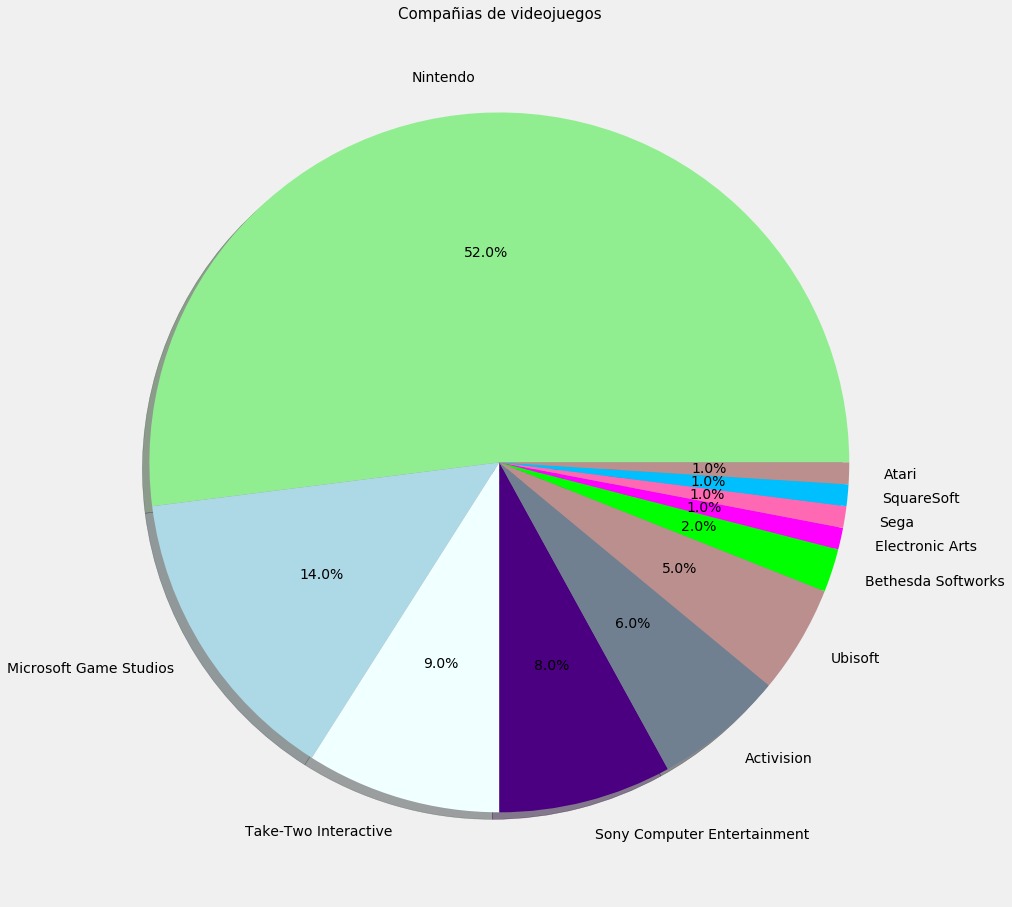

In [13]:
labels = ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 
          'Sony Computer Entertainment', 'Activision', 'Ubisoft', 'Bethesda Softworks',
          'Electronic Arts', 'Sega', 'SquareSoft', 'Atari']
size = df['Publisher'].value_counts()
colors = ['lightgreen', 'lightblue', 'azure', 'indigo', 'slategrey', 'rosybrown', 
          'lime', 'magenta', 'hotpink', 'deepskyblue', 'rosybrown']

plt.rcParams['figure.figsize'] = (15, 15)
plt.pie(size, colors = colors, explode = None, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Compañias de videojuegos', fontsize = 15)
plt.axis('off')
plt.show()

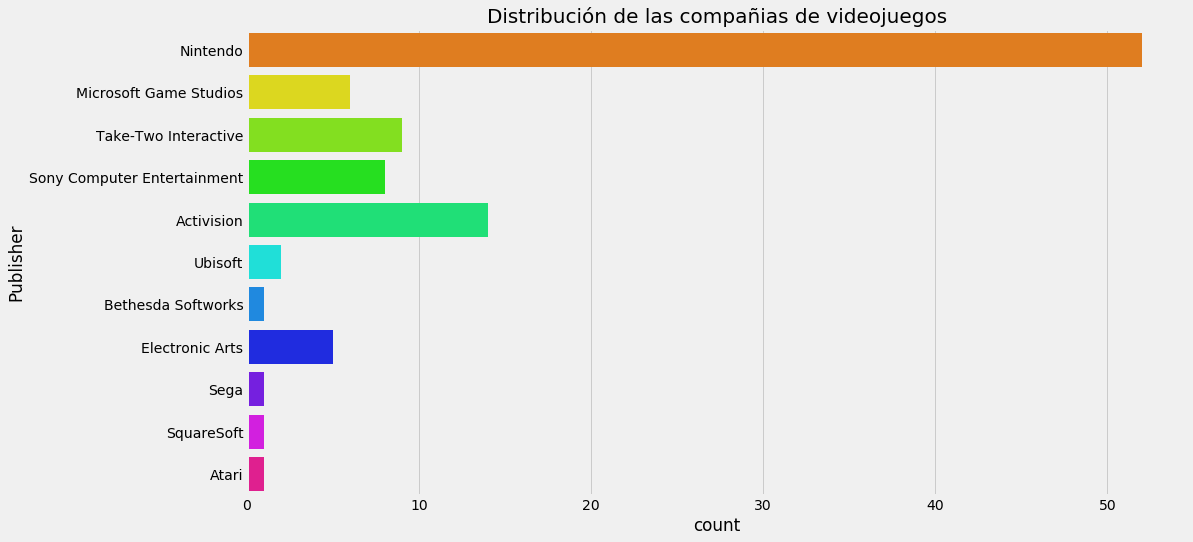

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(y = df['Publisher'], palette = 'hsv')
plt.title('Distribución de las compañias de videojuegos', fontsize = 20)
plt.show()

***
&emsp;

<h2>Crecimiento de los videojuegos a traves de los años</h2>
<h3>Compañías de videojuegos</h3>

In [15]:
d1 = df[df["Publisher"] == "Nintendo"]
d2 = df[df["Publisher"] == "Microsoft Game Studios"]
d3 = df[df["Publisher"] == "Take-Two Interactive"]
d4 = df[df["Publisher"] == "Sony Computer Entertainment"]
d5 = df[df["Publisher"] == "Activision"]
d6 = df[df["Publisher"] == "Ubisoft"]
d7 = df[df["Publisher"] == "Bethesda Softworks"]
d8 = df[df["Publisher"] == "Electronic Arts"]
d9 = df[df["Publisher"] == "Sega"]
d10 = df[df["Publisher"] == "SquareSoft"]
d11 = df[df["Publisher"] == "Atari"]

col = "Year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

vc3 = d3[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3['percent'] = vc3['count'].apply(lambda x : 100*x/sum(vc3['count']))
vc3 = vc3.sort_values(col)

vc4 = d4[col].value_counts().reset_index()
vc4 = vc4.rename(columns = {col : "count", "index" : col})
vc4['percent'] = vc4['count'].apply(lambda x : 100*x/sum(vc4['count']))
vc4 = vc4.sort_values(col)

vc5 = d5[col].value_counts().reset_index()
vc5 = vc5.rename(columns = {col : "count", "index" : col})
vc5['percent'] = vc5['count'].apply(lambda x : 100*x/sum(vc5['count']))
vc5 = vc5.sort_values(col)

vc6 = d6[col].value_counts().reset_index()
vc6 = vc6.rename(columns = {col : "count", "index" : col})
vc6['percent'] = vc6['count'].apply(lambda x : 100*x/sum(vc6['count']))
vc6 = vc6.sort_values(col)

vc7 = d7[col].value_counts().reset_index()
vc7 = vc7.rename(columns = {col : "count", "index" : col})
vc7['percent'] = vc7['count'].apply(lambda x : 100*x/sum(vc7['count']))
vc7 = vc7.sort_values(col)

vc8 = d8[col].value_counts().reset_index()
vc8 = vc8.rename(columns = {col : "count", "index" : col})
vc8['percent'] = vc8['count'].apply(lambda x : 100*x/sum(vc8['count']))
vc8 = vc8.sort_values(col)

vc9 = d9[col].value_counts().reset_index()
vc9 = vc9.rename(columns = {col : "count", "index" : col})
vc9['percent'] = vc9['count'].apply(lambda x : 100*x/sum(vc9['count']))
vc9 = vc9.sort_values(col)

vc10 = d10[col].value_counts().reset_index()
vc10 = vc10.rename(columns = {col : "count", "index" : col})
vc10['percent'] = vc10['count'].apply(lambda x : 100*x/sum(vc10['count']))
vc10 = vc10.sort_values(col)

vc11 = d11[col].value_counts().reset_index()
vc11 = vc11.rename(columns = {col : "count", "index" : col})
vc11['percent'] = vc11['count'].apply(lambda x : 100*x/sum(vc11['count']))
vc11 = vc11.sort_values(col)


trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Nintendo", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Microsoft Game Studios", marker=dict(color="#6ad49b"))
trace3 = go.Scatter(x=vc3[col], y=vc3["count"], name="Take-Two Interactive", marker=dict(color="#739E96"))
trace4 = go.Scatter(x=vc4[col], y=vc4["count"], name="Sony Computer Entertainment", marker=dict(color="#E8ABEB"))
trace5 = go.Scatter(x=vc5[col], y=vc5["count"], name="Activision", marker=dict(color="#C3EBE3"))
trace6 = go.Scatter(x=vc6[col], y=vc6["count"], name="Ubisoft", marker=dict(color="#EBDCAB"))
trace7 = go.Scatter(x=vc7[col], y=vc7["count"], name="Bethesda Softworks", marker=dict(color="#9E7B9D"))
trace8 = go.Scatter(x=vc8[col], y=vc8["count"], name="Electronic Arts", marker=dict(color="#B2B7EB"))
trace9 = go.Scatter(x=vc9[col], y=vc9["count"], name="Sega", marker=dict(color="#EB6228"))
trace10 = go.Scatter(x=vc10[col], y=vc10["count"], name="SquareSoft", marker=dict(color="#EB17B9"))
trace11 = go.Scatter(x=vc11[col], y=vc11["count"], name="Atari", marker=dict(color="#4D9E9D"))


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]
layout = go.Layout(title="Creación videojuegos a través de los años", legend=dict(x=-0.1, y=-0.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

***
&emsp;

<h3>Ventas por año</h3>

In [16]:
_d1 = df[df["Genre"] == "Sports"]
_d2 = df[df["Genre"] == "Platform"]
_d3 = df[df["Genre"] == "Shooter"]
_d4 = df[df["Genre"] == "Fighting"]
_d5 = df[df["Genre"] == "Adventure"]

col = "Year"

vc1 = _d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = _d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

vc3 = _d3[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3['percent'] = vc3['count'].apply(lambda x : 100*x/sum(vc3['count']))
vc3 = vc3.sort_values(col)

vc4 = _d4[col].value_counts().reset_index()
vc4 = vc4.rename(columns = {col : "count", "index" : col})
vc4['percent'] = vc4['count'].apply(lambda x : 100*x/sum(vc4['count']))
vc4 = vc4.sort_values(col)

vc5 = _d5[col].value_counts().reset_index()
vc5 = vc5.rename(columns = {col : "count", "index" : col})
vc5['percent'] = vc5['count'].apply(lambda x : 100*x/sum(vc5['count']))
vc5 = vc5.sort_values(col)

_trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Deportes", marker=dict(color="#26755C"))
_trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Plataforma", marker=dict(color="#B365C2"))
_trace3 = go.Scatter(x=vc3[col], y=vc3["count"], name="Shooter", marker=dict(color="#51C29F"))
_trace4 = go.Scatter(x=vc4[col], y=vc4["count"], name="Peleas", marker=dict(color="#C29E3E"))
_trace5 = go.Scatter(x=vc5[col], y=vc5["count"], name="Aventuras", marker=dict(color="#433EC2"))

data = [_trace1, _trace2, _trace3, _trace4, _trace5]
layout = go.Layout(title="Ventas a través de los años (por género)", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

***
&emsp;

<h3>Ventas por región</h3>

In [17]:
sales_by_year = df.groupby('Year', axis=0).sum().reset_index()[['Year','NA_Sales','EU_Sales',
                                                                'JP_Sales','Other_Sales','Global_Sales']]
sales_by_year.Year = sales_by_year.Year.astype('int')

In [18]:
sales_by_year = sales_by_year[sales_by_year.Year <= 2016]

In [19]:
trace_Global = go.Scatter(
    x = sales_by_year.Year,
    y = sales_by_year.Global_Sales,
    mode = 'none',
    name = 'Global_Sales',
    fill='tonexty',
)

trace_NA = go.Scatter(
    x = sales_by_year.Year,
    y = sales_by_year.NA_Sales,
    mode = 'none',
    fill='tonexty',
    name = 'NA_Sales'
)

trace_EU = go.Scatter(
    x = sales_by_year.Year,
    y = sales_by_year.EU_Sales,
    mode = 'none',
    fill='tonexty',
    name = 'EU_Sales'
)

trace_JP = go.Scatter(
    x = sales_by_year.Year,
    y = sales_by_year.JP_Sales,
    mode = 'none',
    fill='tonexty',
    name = 'JP_Sales'
)

trace_Other = go.Scatter(
    x = sales_by_year.Year,
    y = sales_by_year.Other_Sales,
    mode = 'none',
    fill='tozeroy',
    name = 'Other_Sales'
)



layout = go.Layout(
    title='Ventas por región',

    xaxis=dict(
        title='Año'
    ),
    yaxis=dict(
        title='Ventas (en Millones)'
    ),
    
    height=700, width=800,
    margin=go.Margin(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)


fig = go.Figure(data=[trace_Other, trace_JP, trace_EU, trace_NA, trace_Global], layout=layout)
iplot(fig)

C:\Users\sebas\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




Del gráfico anterior sabemos lo siguiente:

* Norteamérica es siempre el mercado más grande para los videojuegos.
* Las ventas en otras regiones están en auge

***
&emsp;

<h2>Top videojuegos de algunas compañias</h2>


Echaremos un vistazo a los mejores juegos de estos editores:

<h3>Top videojuegos de Nintendo</h3>

![Nintendo](img/Nintendo.gif)

In [20]:
import plotly.offline as py
colorscale = "RdYlBu"

Nintendo_ = FigFact.create_table(df[df.Publisher == 'Nintendo'].sort_values
                                 (by = 'Global_Sales', ascending=False)[['Publisher','Name','Global_Sales']][:5], colorscale)
py.iplot(Nintendo_)

&emsp;
<h3>Top videojuegos de EA</h3>

![Activision](img/Activision.gif)

In [21]:
import plotly.offline as py
colorscale = "PuOr"

Activision_ = FigFact.create_table(df[df.Publisher == 'Activision'].sort_values
                                 (by = 'Global_Sales', ascending=False)[['Publisher','Name','Global_Sales']][:5], colorscale)
py.iplot(Activision_)

&emsp;
<h3>Top videojuegos de EA</h3>

![EA](img/EA.gif)

In [22]:
import plotly.offline as py
colorscale = "PiYG"

EA_ = FigFact.create_table(df[df.Publisher == 'Electronic Arts'].sort_values
                                 (by = 'Global_Sales', ascending=False)[['Publisher','Name','Global_Sales']][:5], colorscale)
py.iplot(EA_)

&emsp;
<h3>Top videojuegos de Microsoft</h3>

![Miccro](img/Micro.gif)

In [23]:
import plotly.offline as py

Micro_ = FigFact.create_table(df[df.Publisher == 'Microsoft Game Studios'].sort_values
                                 (by = 'Global_Sales', ascending=False)[['Publisher','Name','Global_Sales']][:5])
py.iplot(Micro_)

***

<h1>Introducción a K-Means</h1>

<h2>Contexto</h2>

CLUSTERING: es la tarea de asignar un conjunto de objetos a grupos (llamados clústeres) para que los objetos en el mismo clúster sean más similares (en un sentido u otro) entre sí que a los de otros clústeres.

![image](img/Kmeans.png)

https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d

&emsp;

Como un ejemplo ingenuo, los animales pueden agruparse como: 

* Vertebrados,
* Invertebrados,
* Terrestres,
* Acuáticos, 
* etc.

![animals](img/Animals.png)

***
&emsp;

El Agrupamiento por K-Means es un método de agrupación que particiona n puntos de datos en k clústeres (n >> k) en los que dada observación pertenece al clúster con la media más cercana. 

Por medio de un diagrama ilustraremos como es que el algoritmo de K-Means funciona:

![algo](img/KMeansAlgo.png)

***

&emsp;

La proximidad se calcula mediante la función de distancia, que es principalmente la distancia euclidiana o la distancia de Manhattan se expresa matemáticamente de la siguiente forma:

$$d(P_{1}, P_{2}) = \sqrt(x_{2}-x_{1})^{2}+(y_{2}-y_{1})^{2}$$

La **distancia euclideana** entre dos puntos $P_{1}$ y $P_{2}$ de coordenadas $(x_{1}, y_{1}), (x_{2}, y_{2})$ respectivamente se puede expresar de la siguiente forma:

$$
d^{2}_{(i,j)} = \sum^{k}_{k=1}(x_{i,k} - x_{j,k})^{2}
$$

&emsp;

Una suposición importante que se debe hacer es que los puntos de datos son independientes entre sí. En otras palabras, no existe dependencia entre ningún punto de datos.

![GIF](img/ClusterImage.gif)

***

***
<h3>Como funciona el K-Means?</h3>

El algoritmo funciona de la siguiente manera:

* Inicializar los **centroides de los clústeres** $$\mu_{1}, \mu_{2}, \ldots, \mu_{k} \in \mathbb{R}^{n}$$ de manera aleatoria.
* Repetiremos hasta convergir:
    * Para cada una de las $i$, hacemos:
        $$c^{i} := \arg \min_{j} ||x^{i} - \mu_{j}||^{2}$$
        
    * Para cada una de las $j$, hacemos:
        $$\mu_{j} := \frac{\sum_{i=1}^{m} 1\{ c^{i} = j \} x^{i}}{ \sum_{i=1}^{m} 1 \{ c^{i} = j \}}$$
        
* El parámetro $k$ es el número de grupos que queremos encontrar.
* Los centroides agrupados $\mu_{j}$ representan las conjeturas actuales (para las posiciones).
* Para inicializar los centroides del grupo (en el paso 1 del algoritmo anterior), podríamos elegir $k$ ejemplos de entrenamiento al azar y con ellos establecer los centroides del grupo para que sean iguales a los valores de $k$.

&emsp;

Por lo que el algoritmo se vería de la siguiente forma:

![AlgoritmoKMeans](img/Algoritmo.png)

***
&emsp;

<h3> Cómo determinar el mejor valor de k? </h3>

Existen diferentes métodos para saber cual es el valor de $k$, algunos de estos son:

* Elbow Method (Método del codo)
* Silhouette Method (Método de la silueta).

<h4>Elbow Method</h4>

Este es uno de los métodos más conocidos para poder determinar el número óptimo de clusters.
La idea básica detrás de este método es que debemos de trazar los diversos valores de costo con el cambio de $k$. A medida que cambia el número de clusters $k$, habrá menos elementos en el clúster. Por lo que la distorsión promedio disminuirá. En conclusión, el menor número de elementos significa que este es el más cercano al centroide. Por lo tanto, el punto donde se encuentra la disminución de la distorsión es el $\textit{punto de codo}$.

<h4>Silhouette Method</h4>

Obtener un puntaje de coeficiente de silueta alto, está altamente relacionado con un modelo con clústeres mejor definidos. El coeficiente de silueta se define para cada muestra y se compone de dos puntuaciones:

* La distancia media entre una muestra y todos los demás puntos de la misma clase.
* La distancia media entre una muestra y todos los demás puntos del siguiente clúster más cercano.

El coeficiente de silueta para una sola muestra se calcula de la siguiente manera:

$$
s = \frac{b-a}{\max(a,b)}
$$

Para encontrar el valor óptimo de $k$, debemos de realizar lo siguiente:

* Realizar un loop de 1 hasta n para el número de clusters ($n_{clusters}$)
    * Una vez esto, calcularemos el coeficiente de silueta para cada muestra.

Un coeficiente de silueta alto, nos indica que el objeto está bien emparejado con su propio clúster y está mal emparejado con los clústeres vecinos.

***
&emsp;

<h1>2. Pre-procesamiento</h1>

In [24]:
df = pd.read_csv('data/vgsales.csv')

print(df.tail(20))

        Rank                                               Name Platform  \
16578  16581                      Outdoors Unleashed: Africa 3D      3DS   
16579  16582                                  PGA European Tour      N64   
16580  16583                                          Real Rode      PS2   
16581  16584                                          Fit & Fun      Wii   
16582  16585                                    Planet Monsters      GBA   
16583  16586                                     Carmageddon 64      N64   
16584  16587                                   Bust-A-Move 3000       GC   
16585  16588                                             Breach       PC   
16586  16589                     Secret Files 2: Puritas Cordis       DS   
16587  16590                           Mezase!! Tsuri Master DS       DS   
16588  16591                                   Mega Brain Boost       DS   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   
16590  16593

In [25]:
print('Tipo de plataforma: {}\n'.format(df.Platform.unique()))
print('Tipo de genero: {}\n'.format(df.Genre.unique()))
print('Compañía desarrolladora: {}\n'.format(df.Publisher.unique()))

Tipo de plataforma: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Tipo de genero: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Compañía desarrolladora: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Ma

In [26]:
platforms = df['Platform'].unique()
genres = df['Genre'].unique()
platform_val = {}
genre_val = {}
k = 1
for i in platforms:
    platform_val[i] = k
    k = k + 1
k = 1
for i in genres:
    genre_val[i] = k
    k = k + 1
    
df["Platform"] = df["Platform"].apply(lambda x: platform_val[x])
df["Genre"] = df["Genre"].apply(lambda x: genre_val[x])
print(df["Genre"].head(10))

0    1
1    2
2    3
3    1
4    4
5    5
6    2
7    6
8    2
9    7
Name: Genre, dtype: int64


In [27]:
df.drop(['Rank','Name','Publisher'], axis = 1, inplace = True)
print(df.head(10))

   Platform    Year  Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         1  2006.0      1     41.49     29.02      3.77         8.46   
1         2  1985.0      2     29.08      3.58      6.81         0.77   
2         1  2008.0      3     15.85     12.88      3.79         3.31   
3         1  2009.0      1     15.75     11.01      3.28         2.96   
4         3  1996.0      4     11.27      8.89     10.22         1.00   
5         3  1989.0      5     23.20      2.26      4.22         0.58   
6         4  2006.0      2     11.38      9.23      6.50         2.90   
7         1  2006.0      6     14.03      9.20      2.93         2.85   
8         1  2009.0      2     14.59      7.06      4.70         2.26   
9         2  1984.0      7     26.93      0.63      0.28         0.47   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  
5         30.26  
6         30.01  
7         29.02  
8         28.62  
9         28.31 

In [28]:
print('Valores que contienen NaN')
for column in df:
    if df[column].isnull().any():
        print('La columna que contiene valores NaN es: {}'.format(column))

Valores que contienen NaN
La columna que contiene valores NaN es: Year


Por lo que procederemos a eliminar está columna del conjunto de datos. 

In [29]:
df['Year'].fillna(df['Year'].mean(), inplace = True)
df.to_csv('data/modified.csv')

Echo esto, nuestro conjunto de datos parece estar limpio, eliminando así valores que erán desconocidos.
***
&emsp;

<h1>3. K-Means utilizando sklearn</h1>

<h2>3.1 Análisis del conjunto de datos</h2>

<h3>Importando el conjunto de datos</h3>

In [30]:
data_Mod = pd.read_csv('data/modified.csv')

<h3>Información del conjunto de datos</h3>

In [31]:
from plotly.tools import FigureFactory as FigFact
import plotly.offline as py

# Crearemos una tabla para mostrar los datos
_tab = FigFact.create_table(data_Mod.head())

# Mostrar la tabla
py.iplot(_tab)

In [32]:
print('La forma del conjunto de datos es la siguiente: {}'.format(data_Mod.shape))

La forma del conjunto de datos es la siguiente: (16598, 9)


In [33]:
data_Mod.describe()

,Unnamed: 0,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8298.500000,9.609833,2006.406443,6.260333,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.574219,5.901295,5.781197,3.421823,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,1.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4149.250000,5.000000,2003.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8298.500000,7.000000,2007.000000,7.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12447.750000,14.000000,2010.000000,9.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16597.000000,31.000000,2020.000000,12.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<h2>3.2 Análisis por clusters - Ventas globales vs Ventas en E.U.A</h2>
<h3>Generando arreglo de características</h3>

El algoritmo de K-Means es un algoritmo que pertenece al aprendizaje no supervisado. Por lo tanto, no es necesario especificar una variable de destino. Por ello, que podemos considerar que las características que seleccionaremos serán:

* NA_Sales
* Global_Sales

Por lo que nuestro arreglo queda de la siguiente forma:

In [34]:
x = data_Mod.iloc[:, [4, 8]].values
print('El valor del arreglo es: {}'.format(x.shape))
print(x[0])

El valor del arreglo es: (16598, 2)
[41.49 82.74]


<h3>Valor óptimo de k</h3>

Utilizaremos el método del codo (**Elbow Method**) para encontrar el No. de Clústeres Óptimos para implementar en nuestro algorimto de *K-Means*. 

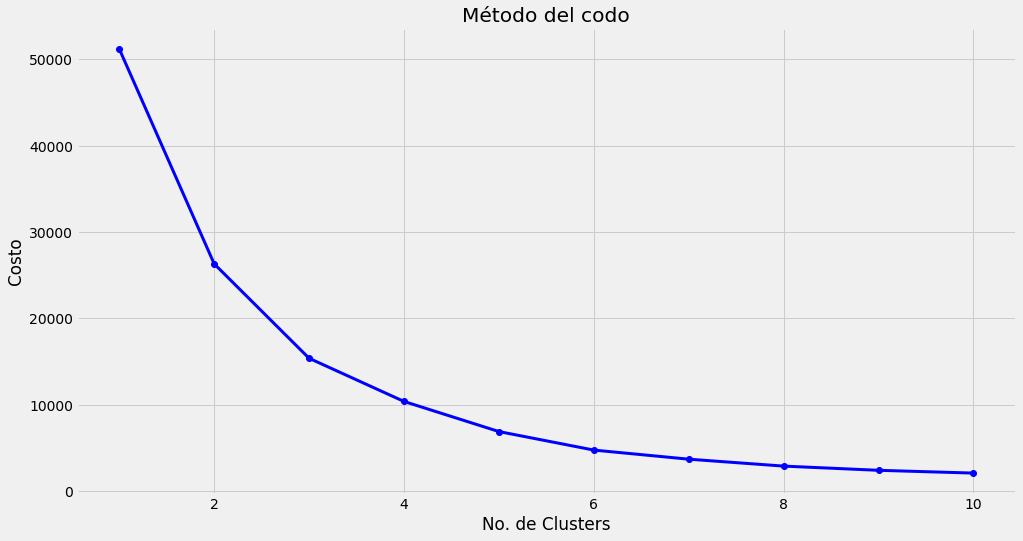

In [35]:
from sklearn.cluster import KMeans

_cost =[] 
for i in range(1, 11): 
    K_means = KMeans(n_clusters = i, max_iter = 500) 
    K_means.fit(x)
      
    # Calculamos el error cuadrado medio 
    # para los puntos de los clusters
    _cost.append(K_means.inertia_)      
    
plt.plot(range(1, 11), _cost, color ='b', marker='o' ,linewidth ='3') 
plt.xlabel("No. de Clusters") 
plt.ylabel("Costo")
plt.title('Método del codo')
plt.show()

In [36]:
print('Valor de distorción: {}'.format(K_means.inertia_))

Valor de distorción: 2084.7263734512903


De la gráfica anterior, podemos observar que el punto de codo podría estar entre los valores de: $k=2$, $k=3$ ó $k=4$. Por lo que probaremos con cada uno de ellos. 

<h3>Aplicando el algoritmo de K-Means</h3>

In [37]:
from sklearn.cluster import KMeans

_KMeans_1 = KMeans(n_clusters = 3, max_iter = 500, n_init = 10, random_state = 0)
_yMeans_1 = _KMeans_1.fit_predict(x)

<h4>Visualización de los datos del predictor</h4>

In [38]:
print(_yMeans_1)

[1 1 1 ... 0 0 0]


In [39]:
df_pred = pd.DataFrame(_yMeans_1)
df_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


<h4>Información de los clusters</h4>

In [40]:
labels = _KMeans_1.labels_
centroids = _KMeans_1.cluster_centers_

In [41]:
print('Las etiquetas son: {}'.format(labels))

Las etiquetas son: [1 1 1 ... 0 0 0]


In [42]:
print('Los centroides son: {}'.format(centroids))

Los centroides son: [[ 0.16844581  0.34135906]
 [13.73       27.0624    ]
 [ 2.32263699  4.77035959]]


<h3>Visualización de los clusters</h3>

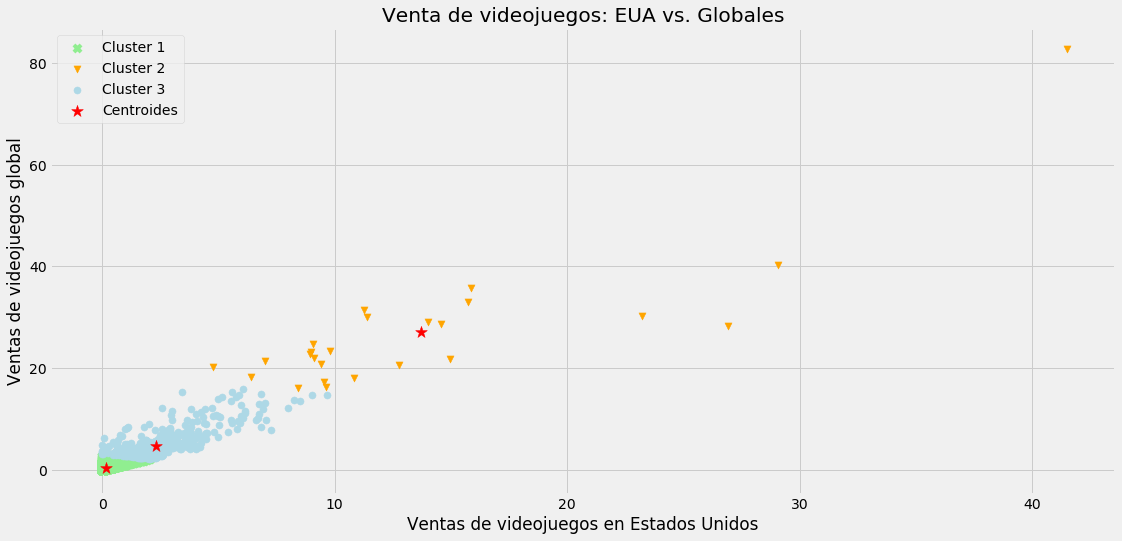

In [43]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x[_yMeans_1 == 0, 0], x[_yMeans_1 == 0, 1], s = 50, c = 'lightgreen', marker = 'x', label = 'Cluster 1')
plt.scatter(x[_yMeans_1 == 1, 0], x[_yMeans_1 == 1, 1], s = 50, c = 'orange', marker= 'v', label = 'Cluster 2')
plt.scatter(x[_yMeans_1 == 2, 0], x[_yMeans_1 == 2, 1], s = 50, c = 'lightblue', marker = 'o', label = 'Cluster 3')

plt.scatter(_KMeans_1.cluster_centers_[:, 0], _KMeans_1.cluster_centers_[:, 1], s = 150, c = 'red', marker = '*',
            label = 'Centroides')
# Info. del gráfico
plt.title('Venta de videojuegos: EUA vs. Globales')
plt.xlabel('Ventas de videojuegos en Estados Unidos')
plt.ylabel('Ventas de videojuegos global')
plt.legend()
plt.show()

***
&emsp;

<h2>3.2 Análisis por clusters: ventas en EUA vs. ventas en Japón</h2>
<h3>Generando arreglo de características</h3>

El algoritmo de K-Means es un algoritmo que pertenece al aprendizaje no supervisado. Por lo tanto, no es necesario especificar una variable de destino. Por ello, que podemos considerar que las características que seleccionaremos serán:

* NA_Sales
* JP_Sales

Por lo que nuestro arreglo queda de la siguiente forma:

In [44]:
x_2 = data_Mod.iloc[:, [4, 6]].values
print('El valor del arreglo es: {}'.format(x_2.shape))
print(x_2[0])

El valor del arreglo es: (16598, 2)
[41.49  3.77]


<h3>Valor óptimo de k</h3>

Utilizaremos el método del codo (Elbow Method) para encontrar el No. de Clústeres Óptimos para implementar en nuestro algorimto de K-Means.

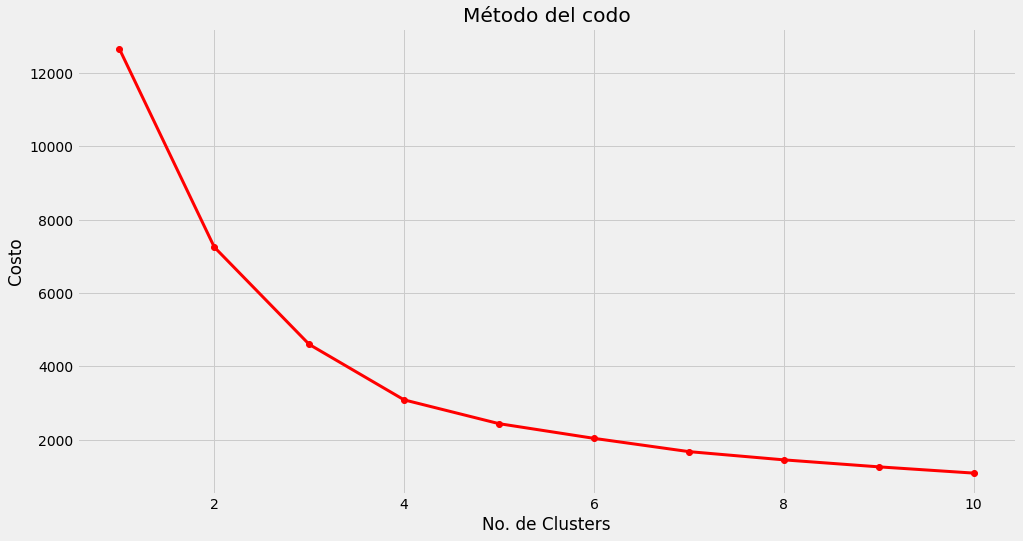

In [45]:
from sklearn.cluster import KMeans

_cost =[] 
for i in range(1, 11): 
    K_means_2 = KMeans(n_clusters = i, max_iter = 500) 
    K_means_2.fit(x_2)
      
    # Calculamos el error cuadrado medio 
    # para los puntos de los clusters
    _cost.append(K_means_2.inertia_)      
    
plt.plot(range(1, 11), _cost, color ='r', marker='o' ,linewidth ='3') 
plt.xlabel("No. de Clusters") 
plt.ylabel("Costo")
plt.title('Método del codo')
plt.show()

In [46]:
print('Valor de distorción: {}'.format(K_means_2.inertia_))

Valor de distorción: 1092.3906467975764


De la gráfica anterior, podemos observar que el punto de codo podría estar entre los valores de:  𝑘=2 ,  𝑘=3  ó  𝑘=4 . Por lo que probaremos con cada uno de ellos.

<h3>Aplicando el algoritmo de K-Means</h3>

In [47]:
from sklearn.cluster import KMeans

_KMeans_2 = KMeans(n_clusters = 2, max_iter = 500, n_init = 10, random_state = 0)
_yMeans_2 = _KMeans_2.fit_predict(x_2)

<h4>Visualización de los datos al predictor</h4>

In [48]:
print(_yMeans_2)

[1 1 1 ... 0 0 0]


In [49]:
df_pred = pd.DataFrame(_yMeans_2)
df_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


<h4>Información de los clusters</h4>

In [50]:
labels_2 = _KMeans_2.labels_
centroids_2 = _KMeans_2.cluster_centers_

In [51]:
print('Las etiquetas son: {}'.format(labels_2))

Las etiquetas son: [1 1 1 ... 0 0 0]


In [52]:
print('El valor de los centroides son: {}'.format(centroids_2))

El valor de los centroides son: [[0.22784992 0.06868321]
 [8.5990411  2.13739726]]


<h3>Visualización de los clusters</h3>

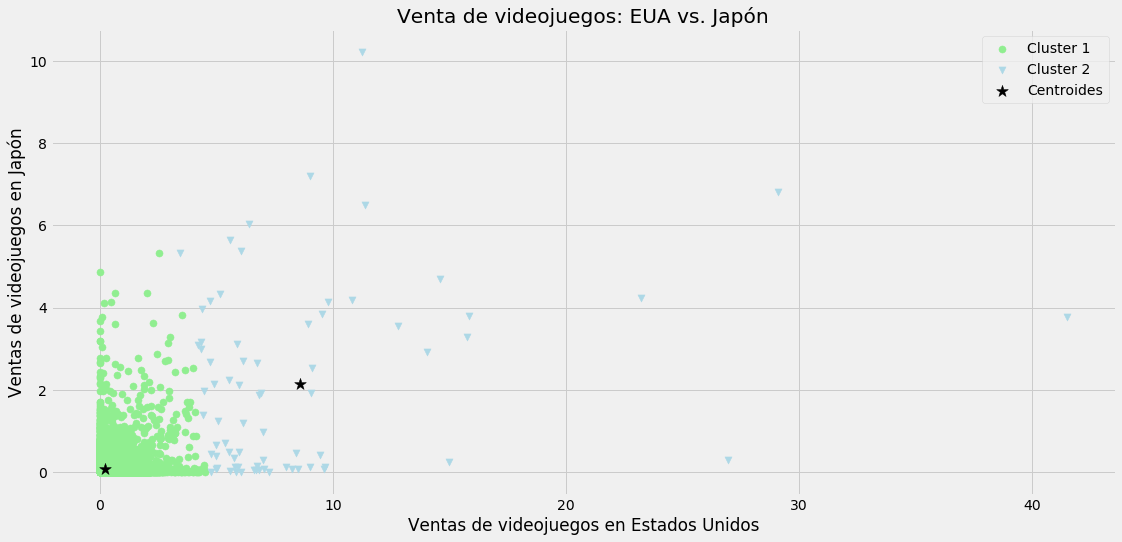

In [53]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x_2[_yMeans_2 == 0, 0], x_2[_yMeans_2 == 0, 1], s = 50, c = 'lightgreen', marker = 'o', label = 'Cluster 1')
plt.scatter(x_2[_yMeans_2 == 1, 0], x_2[_yMeans_2 == 1, 1], s = 50, c = 'lightblue', marker= 'v', label = 'Cluster 2')

plt.scatter(_KMeans_2.cluster_centers_[:, 0], _KMeans_2.cluster_centers_[:, 1], s = 150, c = 'black', marker = '*',
            label = 'Centroides')
# Info. del gráfico
plt.title('Venta de videojuegos: EUA vs. Japón')
plt.xlabel('Ventas de videojuegos en Estados Unidos')
plt.ylabel('Ventas de videojuegos en Japón')
plt.legend()
plt.show()

***
&emsp;

<h2>3.3 Análisis por clusters: Segmentación usando el año vs. ventas en EUA vs. ventas globales</h2>
<h3>Generando arreglo de características</h3>

El algoritmo de K-Means es un algoritmo que pertenece al aprendizaje no supervisado. Por lo tanto, no es necesario especificar una variable de destino. Por ello, que podemos considerar que las características que seleccionaremos serán:

* EU_Sales
* Global_Sales
* Year

Por lo que nuestro arreglo queda de la siguiente forma:

In [54]:
x_final = data_Mod.iloc[:, [2,4,8]].values
print('El arreglo tiene la forma: {}'.format(x_final.shape))
print(x_final[0])

El arreglo tiene la forma: (16598, 3)
[2006.     41.49   82.74]


<h3>Valor óptimo de k</h3>

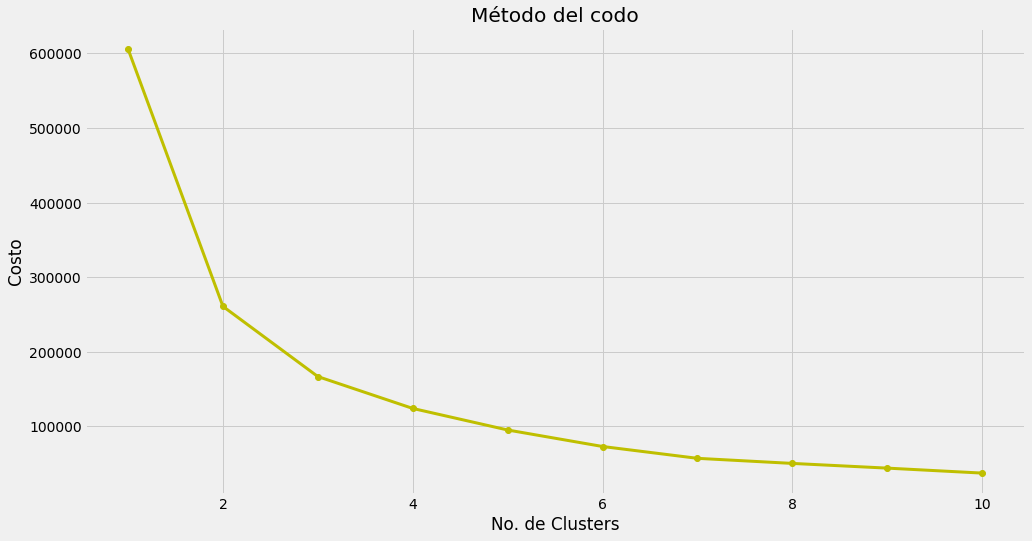

In [55]:
from sklearn.cluster import KMeans

_cost =[] 
for i in range(1, 11): 
    _KMeans_Segmentation = KMeans(n_clusters = i, max_iter = 500) 
    _KMeans_Segmentation.fit(x_final)
      
    # Calculamos el error cuadrado medio 
    # para los puntos de los clusters
    _cost.append(_KMeans_Segmentation.inertia_)      
    
plt.plot(range(1, 11), _cost, color ='y', marker='o' ,linewidth ='3') 
plt.xlabel("No. de Clusters") 
plt.ylabel("Costo")
plt.title('Método del codo')
plt.show()

<h3>Aplicando K-Means</h3>

In [56]:
from sklearn.cluster import KMeans

_KMeans_final = KMeans(n_clusters = 4, max_iter = 500, n_init = 10, random_state = 0)
_yMeans_final = _KMeans_final.fit_predict(x_final)

<h4>Definir las etiquetas y centroides</h4>

In [57]:
labels = _KMeans_final.labels_
centroids = _KMeans_final.cluster_centers_

In [58]:
data_Mod['labels'] =  labels
trace1 = go.Scatter3d(
    x = data_Mod['Year'],
    y = data_Mod['NA_Sales'],
    z = data_Mod['Global_Sales'],
    mode='markers',
     marker=dict(
        color = data_Mod['labels'], 
        size= 10,
        line=dict(
            color= data_Mod['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df_ = [trace1]

layout = go.Layout(
    title = 'Segmentación de años vs. ventas en EUA vs. ventas globales',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Año'),
            yaxis = dict(title  = 'Ventas en EUA'),
            zaxis = dict(title  = 'Ventas Globales')
        )
)

fig = go.Figure(data = df_, layout = layout)
py.iplot(fig)

***
&emsp;